# DSA Assignment 8

💡 **Question 1**

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.


In [1]:
class Solution:
    def minimumDeleteSum(self, s1, s2):
        return self.helper(s1, s2, 0, 0)
    
    def helper(self, s1, s2, i, j):
        if i == len(s1) and j == len(s2):
            return 0
        
        if i == len(s1):
            return self.helper(s1, s2, i, j + 1) + ord(s2[j])
        
        if j == len(s2):
            return self.helper(s1, s2, i + 1, j) + ord(s1[i])
        
        if s1[i] == s2[j]:
            return self.helper(s1, s2, i + 1, j + 1)
        
        return min(
            self.helper(s1, s2, i + 1, j) + ord(s1[i]),
            self.helper(s1, s2, i, j + 1) + ord(s2[j])
        )


In [2]:
s1 = "sea"
s2 = "eat"

solution = Solution()
result = solution.minimumDeleteSum(s1, s2)
print(result)  


231


💡 **Question 2**

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true


In [4]:
class Solution():
    def isValid(self, s):
        count = 0
        stars = 0
        
        for char in s:
            if char == '(':
                count += 1
            elif char == ')':
                if count > 0:
                    count -= 1
                elif stars > 0:
                    stars -= 1
                else:
                    return False
            elif char == '*':
                stars += 1
        
        return count <= stars

        

In [5]:
s='()'
Solution().isValid(s)

True

In [8]:
s='(*'
Solution().isValid(s)

True


💡 **Question 3**

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".


In [ ]:
class Solution():
    def equal(self,word1,word2):
        count=0
        for i in word1:
            if i not in word2:
                count+=1
        for j in word2:
            if j not in word1:
                count+=1
        return count

In [18]:
word1='sea'
word2='eat'
Solution().equal(word1,word2)

2

In [22]:
word1='bats'
word2="cat's"
Solution().equal(word1,word2)

3


💡 **Question 4**

You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.

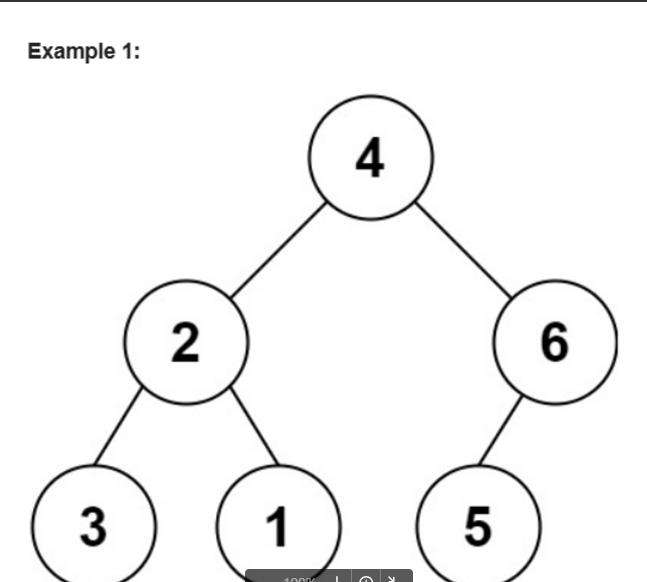


In [61]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def str2tree(self, s):
        def build_tree(s, start, end):
            if start > end:
                return None

            i = start
            while i <= end and (s[i].isdigit() or s[i] == '-'):
                i += 1

            root_val = int(s[start:i])
            root = TreeNode(root_val)

            if i <= end and s[i] == '(':
                count = 0
                j = i
                while j <= end:
                    if s[j] == '(':
                        count += 1
                    elif s[j] == ')':
                        count -= 1

                    if count == 0:
                        break

                    j += 1

                root.left = build_tree(s, i + 1, j - 1)

                if j + 1 <= end and s[j + 1] == '(':
                    root.right = build_tree(s, j + 2, end - 1)

            return root

        return build_tree(s, 0, len(s) - 1)


# Example usage
s = "4(2(3)(1))(6(5))"
solution = Solution()
root = solution.str2tree(s)

##Preorder

# Function to convert the binary tree to a list (inorder traversal)
def tree_to_list(root):
    if not root:
        return []

    return tree_to_list(root.left) + [root.val] + tree_to_list(root.right)

# Convert the binary tree to a list and print the result
result = tree_to_list(root)
print(result)  


[3, 2, 1, 4, 5, 6]



💡 **Question 5**

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".

</aside>

In [28]:
def compress(chars):
    write = 0
    read = 0
    count = 0
    prev_char = None

    while read < len(chars):
        if prev_char is None or chars[read] == prev_char:
            count += 1
        else:
            chars[write] = prev_char
            write += 1
            if count > 1:
                count_str = str(count)
                for digit in count_str:
                    chars[write] = digit
                    write += 1
            count = 1
        prev_char = chars[read]
        read += 1

    chars[write] = prev_char
    write += 1
    if count > 1:
        count_str = str(count)
        for digit in count_str:
            chars[write] = digit
            write += 1

    return write


In [32]:
char = ["a","a","b","b","c","c","c"]
new_length = compress(char)
print(new_length)
print(char[:new_length])

6
['a', '2', 'b', '2', 'c', '3']


💡 **Question 7**

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"

</aside>

In [130]:
class Solution:
    def decoder(self, s):
        stack = []
        r = ''
        for char in s:
            if char.isdigit():
                stack.append(int(char))
            elif char == '[':
                stack.append(r)
                r = ''
            elif char == ']':
                repeat_str = stack.pop()
                repeat_count = stack.pop()
                r = repeat_str + r * repeat_count
            else:
                r += char
        return r


In [131]:
s = "3[a]2[bc]"
Solution().decoder(s)

'aaabcbc'


💡 **Question 8**

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

</aside>

In [49]:
class Solution():
    def can_swap_letters(self, s, goal):
        if s == goal:
            return True
        
        diff_positions = []
        
        for i in range(len(s)):
            if s[i] != goal[i]:
                diff_positions.append(i)
            
            # If we have more than two differing positions, return False
            if len(diff_positions) > 2:
                return False
        
        # If we have exactly two differing positions, check if swapping results in s == goal
        if len(diff_positions) == 2:
            i, j = diff_positions
            # Swap the characters at the differing positions
            s = list(s)
            s[i], s[j] = s[j], s[i]
            s = ''.join(s)
            # Check if the strings are equal after swapping
            if s == goal:
                return True
        
        return False


In [51]:
s='ab'
goal='ba'
Solution().can_swap_letters(s,goal)

True

In [53]:
s='nab'
goal='ban'
Solution().can_swap_letters(s,goal)

True

## The End